In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'sales_data - Sheet1.csv'  
df = pd.read_csv(file_path)

In [3]:
print(df.head())

         Date    Product  Sales  Quantity Region
0  01-01-2023  Product A    200         4  North
1  02-01-2023  Product B    150         3  South
2  03-01-2023  Product A    220         5  North
3  04-01-2023  Product C    300         6   East
4  05-01-2023  Product B    180         4   West


In [4]:
print(df.isnull().sum())

Date        0
Product     0
Sales       0
Quantity    0
Region      0
dtype: int64


In [5]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df = df.dropna(subset=['Product', 'Quantity', 'Region'])

In [6]:
print(df.describe())

            Sales   Quantity
count   16.000000  16.000000
mean   237.500000   5.375000
std     64.031242   1.746425
min    150.000000   3.000000
25%    187.500000   4.000000
50%    225.000000   5.500000
75%    302.500000   7.000000
max    340.000000   8.000000


In [7]:
product_summary = df.groupby('Product').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(product_summary)

     Product  Sales  Quantity
0  Product A   1350        33
1  Product B    850        17
2  Product C   1600        36


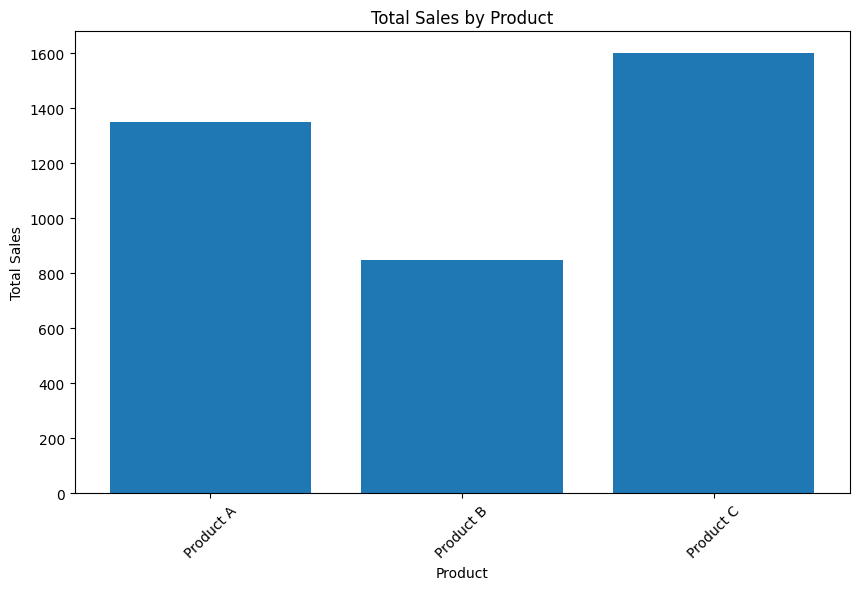

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(product_summary['Product'], product_summary['Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  
df = df.dropna(subset=['Date'])

In [10]:
sales_over_time = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()

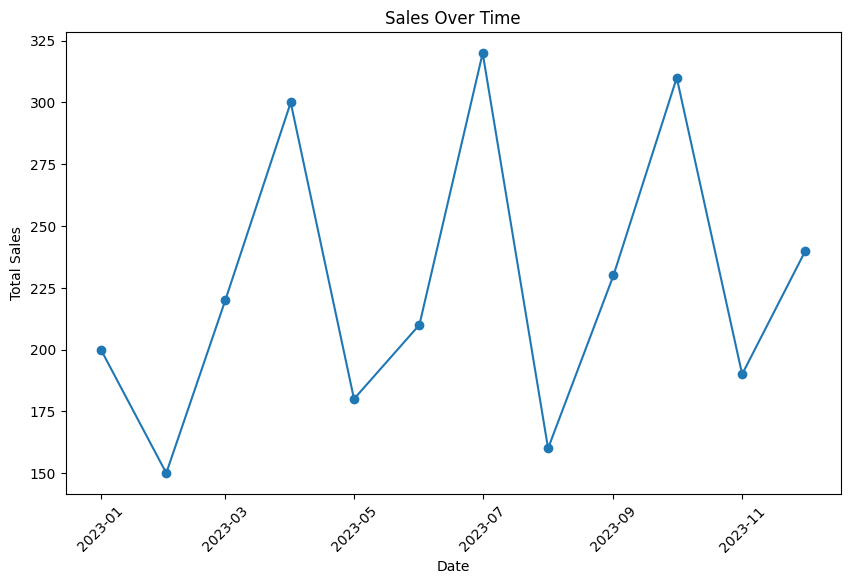

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()

In [12]:
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product',
                             aggfunc='sum', fill_value=0)
print(pivot_table)

Product  Product A  Product B  Product C
Region                                  
East             0          0        930
North         1100          0          0
South            0        310          0
West             0        370          0


In [13]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

            Sales  Quantity
Sales     1.00000   0.94268
Quantity  0.94268   1.00000


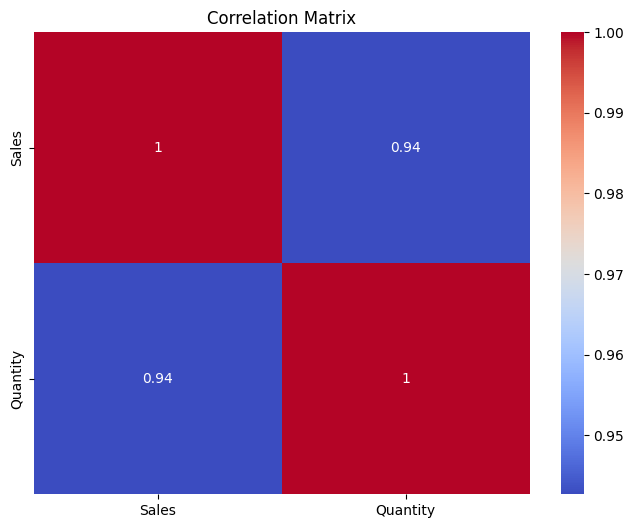

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()